In [1]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = torch.linspace(0, 799, 800)

In [3]:
x

tensor([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,
         24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,
         36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,
         48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,
         60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,
         72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,
         84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,
         96.,  97.,  98.,  99., 100., 101., 102., 103., 104., 105., 106., 107.,
        108., 109., 110., 111., 112., 113., 114., 115., 116., 117., 118., 119.,
        120., 121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
        132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
        144., 145., 146., 147., 148., 14

In [4]:
y = torch.sin(x*2*3.1416/40)

In [5]:
y

tensor([ 0.0000e+00,  1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,
         7.0711e-01,  8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,
         1.0000e+00,  9.8769e-01,  9.5106e-01,  8.9100e-01,  8.0901e-01,
         7.0710e-01,  5.8778e-01,  4.5398e-01,  3.0901e-01,  1.5643e-01,
        -7.2400e-06, -1.5644e-01, -3.0902e-01, -4.5400e-01, -5.8779e-01,
        -7.0711e-01, -8.0902e-01, -8.9101e-01, -9.5106e-01, -9.8769e-01,
        -1.0000e+00, -9.8769e-01, -9.5105e-01, -8.9100e-01, -8.0901e-01,
        -7.0710e-01, -5.8777e-01, -4.5398e-01, -3.0900e-01, -1.5642e-01,
         1.4480e-05,  1.5645e-01,  3.0903e-01,  4.5400e-01,  5.8780e-01,
         7.0712e-01,  8.0903e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,
         1.0000e+00,  9.8769e-01,  9.5105e-01,  8.9100e-01,  8.0901e-01,
         7.0709e-01,  5.8777e-01,  4.5397e-01,  3.0900e-01,  1.5641e-01,
        -2.1005e-05, -1.5646e-01, -3.0904e-01, -4.5401e-01, -5.8780e-01,
        -7.0712e-01, -8.0903e-01, -8.9102e-01, -9.5

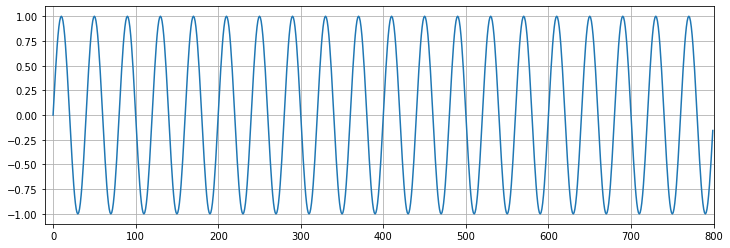

In [6]:
plt.figure(figsize=(12, 4))
plt.xlim(-10, 801)
plt.grid(True)
plt.plot(y.numpy())

In [7]:
test_size=40
train_set=y[:-test_size]
test_set=y[-test_size:]

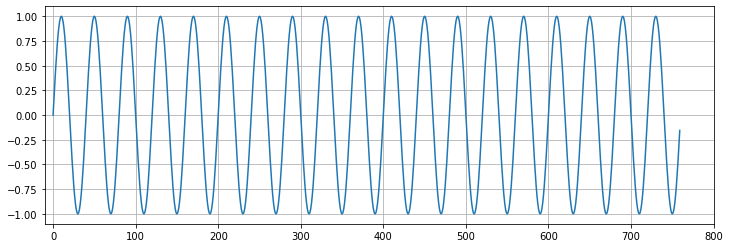

In [8]:
plt.figure(figsize=(12,4))
plt.xlim(-10, 801)
plt.grid(True)
plt.plot(train_set.numpy())

In [9]:
def input_data(seq, ws):
    out = [] # ([0, 1, 2, 3], [4])
    L = len(seq)
    
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window,label))
        
    return out

In [10]:
window_size=40
train_data = input_data(train_set, window_size)
len(train_data)

720

In [11]:
train_data[0]

(tensor([ 0.0000e+00,  1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,
          7.0711e-01,  8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,
          1.0000e+00,  9.8769e-01,  9.5106e-01,  8.9100e-01,  8.0901e-01,
          7.0710e-01,  5.8778e-01,  4.5398e-01,  3.0901e-01,  1.5643e-01,
         -7.2400e-06, -1.5644e-01, -3.0902e-01, -4.5400e-01, -5.8779e-01,
         -7.0711e-01, -8.0902e-01, -8.9101e-01, -9.5106e-01, -9.8769e-01,
         -1.0000e+00, -9.8769e-01, -9.5105e-01, -8.9100e-01, -8.0901e-01,
         -7.0710e-01, -5.8777e-01, -4.5398e-01, -3.0900e-01, -1.5642e-01]),
 tensor([1.4480e-05]))

In [12]:
torch.set_printoptions(sci_mode=False) # to improve the appearance of tensors
train_data[0]

(tensor([     0.0000,      0.1564,      0.3090,      0.4540,      0.5878,
              0.7071,      0.8090,      0.8910,      0.9511,      0.9877,
              1.0000,      0.9877,      0.9511,      0.8910,      0.8090,
              0.7071,      0.5878,      0.4540,      0.3090,      0.1564,
             -0.0000,     -0.1564,     -0.3090,     -0.4540,     -0.5878,
             -0.7071,     -0.8090,     -0.8910,     -0.9511,     -0.9877,
             -1.0000,     -0.9877,     -0.9511,     -0.8910,     -0.8090,
             -0.7071,     -0.5878,     -0.4540,     -0.3090,     -0.1564]),
 tensor([    0.0000]))

In [13]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, out_size=1):
        super().__init__()
        self.hidden_size = hidden_size
        
        # Add an LSTM layer:
        self.lstm = nn.LSTM(input_size,hidden_size)
        
        # Add a fully-connected layer:
        self.linear = nn.Linear(hidden_size,out_size)
        
        # Initialize h0 and c0:
        self.hidden = (torch.zeros(1,1,hidden_size),
                       torch.zeros(1,1,hidden_size))
    
    def forward(self,seq):
        lstm_out, self.hidden = self.lstm(
            seq.view(len(seq), 1, -1), self.hidden)
        pred = self.linear(lstm_out.view(len(seq),-1))
        return pred[-1]   # we only care about the last prediction

In [14]:
torch.manual_seed(42)
model = LSTM()

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [15]:
model

LSTM(
  (lstm): LSTM(1, 50)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

In [16]:
for p in model.parameters():
    print(p.numel())

200
10000
200
200
50
1


Epoch:  1 Loss: 0.00229176
Loss on test predictions: 0.5043660402297974


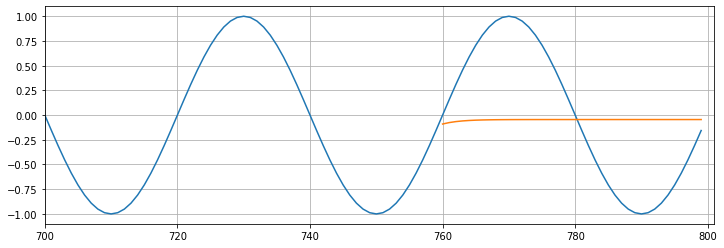

Epoch:  2 Loss: 0.00050309
Loss on test predictions: 0.5092831254005432


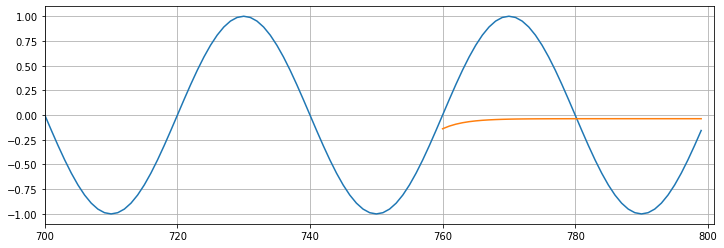

Epoch:  3 Loss: 0.01564094
Loss on test predictions: 0.5279306769371033


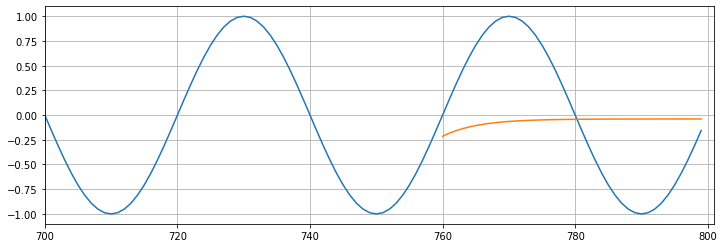

Epoch:  4 Loss: 0.04849536
Loss on test predictions: 0.5681353211402893


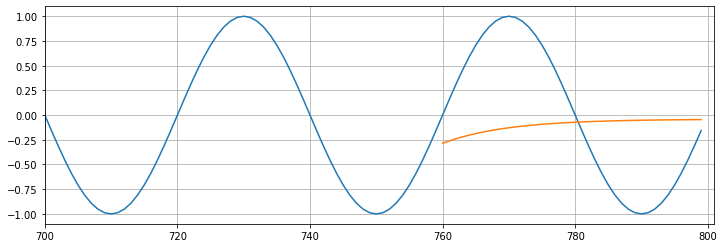

Epoch:  5 Loss: 0.07737552
Loss on test predictions: 0.603827178478241


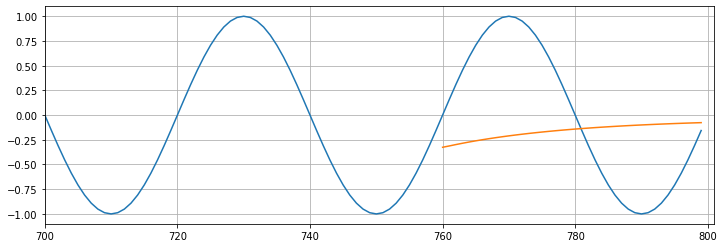

Epoch:  6 Loss: 0.09165359
Loss on test predictions: 0.6156729459762573


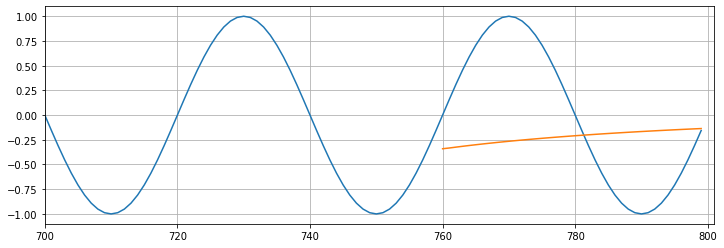

Epoch:  7 Loss: 0.09571436
Loss on test predictions: 0.6162710189819336


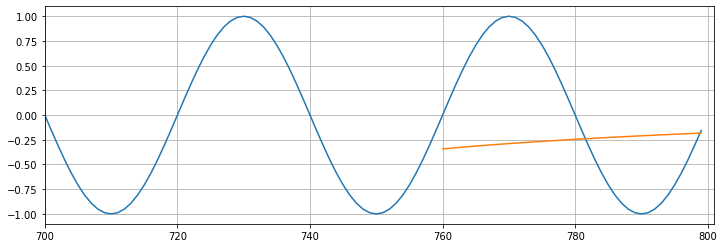

Epoch:  8 Loss: 0.09504738
Loss on test predictions: 0.6133379340171814


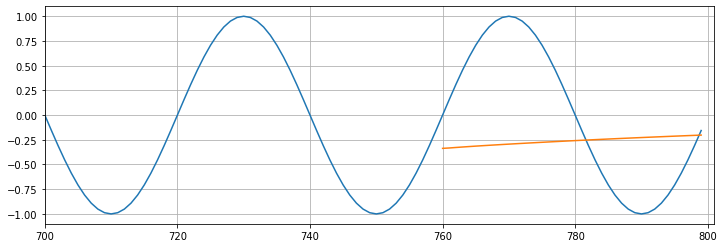

Epoch:  9 Loss: 0.09255653
Loss on test predictions: 0.609329104423523


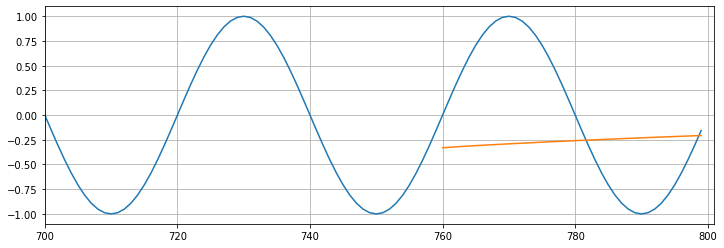

Epoch: 10 Loss: 0.08946506
Loss on test predictions: 0.6051582098007202


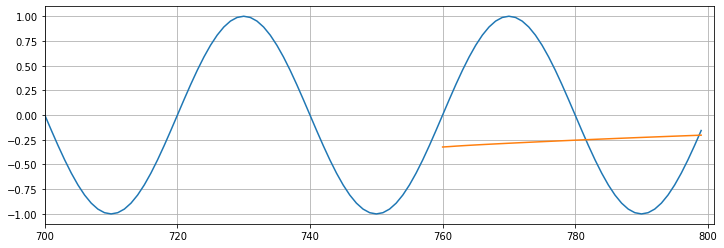

Epoch: 11 Loss: 0.08624685
Loss on test predictions: 0.6011538505554199


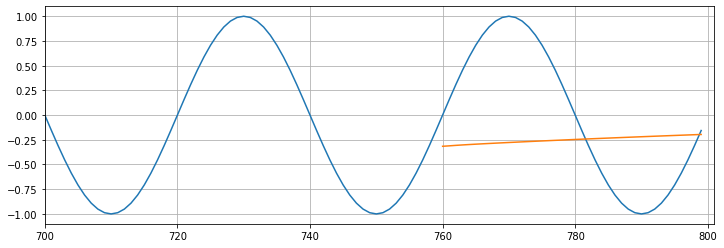

Epoch: 12 Loss: 0.08307487
Loss on test predictions: 0.5974141955375671


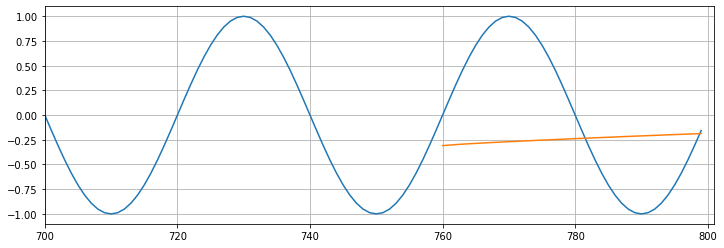

Epoch: 13 Loss: 0.08000461
Loss on test predictions: 0.593955934047699


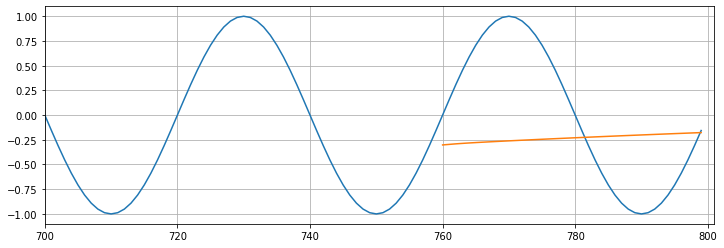

Epoch: 14 Loss: 0.07704726
Loss on test predictions: 0.5907708406448364


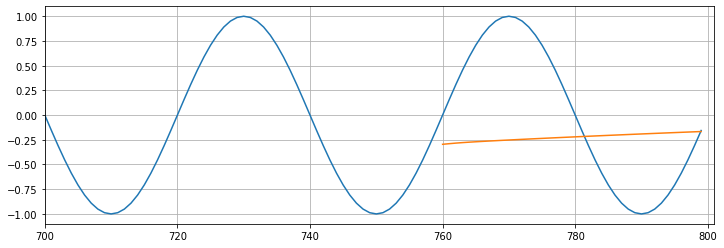

Epoch: 15 Loss: 0.07419626
Loss on test predictions: 0.5878461003303528


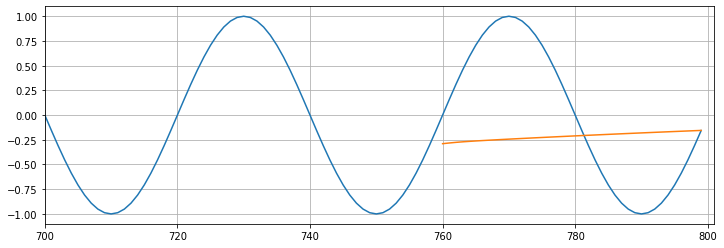

Epoch: 16 Loss: 0.07143969
Loss on test predictions: 0.5851700901985168


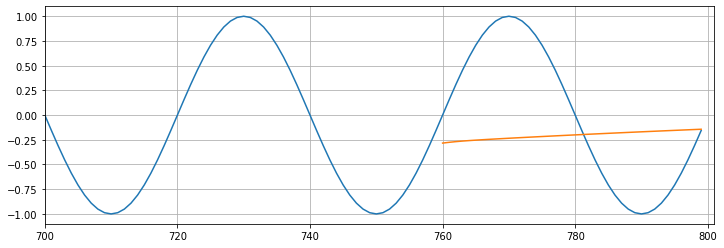

Epoch: 17 Loss: 0.06876369
Loss on test predictions: 0.5827347040176392


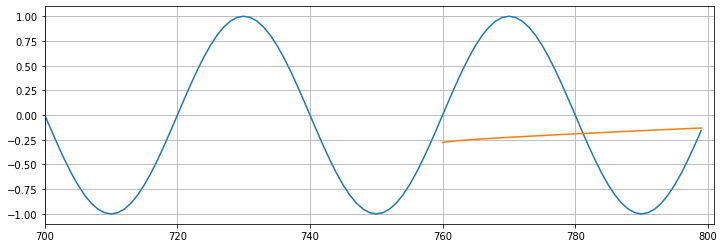

Epoch: 18 Loss: 0.06615458
Loss on test predictions: 0.580535888671875


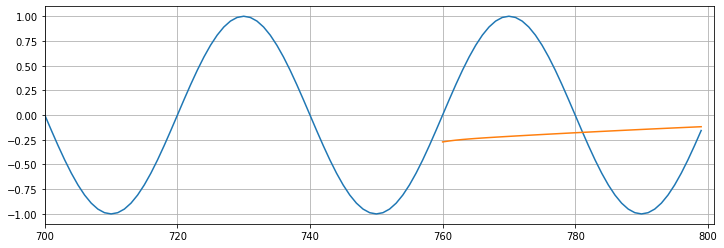

Epoch: 19 Loss: 0.06359931
Loss on test predictions: 0.5785735249519348


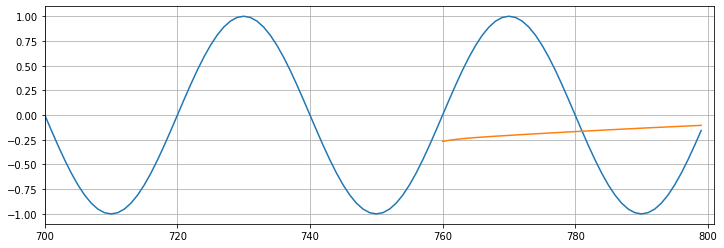

Epoch: 20 Loss: 0.06108586
Loss on test predictions: 0.5768496990203857


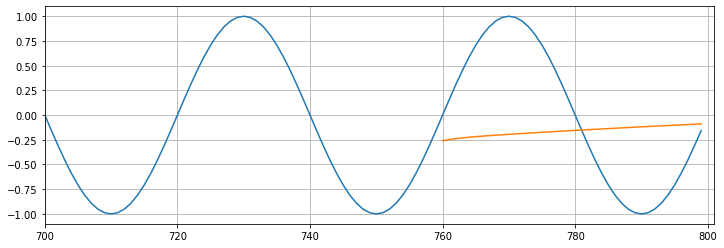

Epoch: 21 Loss: 0.05860304
Loss on test predictions: 0.5753698945045471


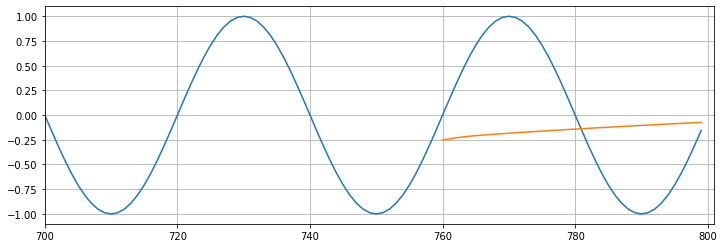

Epoch: 22 Loss: 0.05614107
Loss on test predictions: 0.5741395950317383


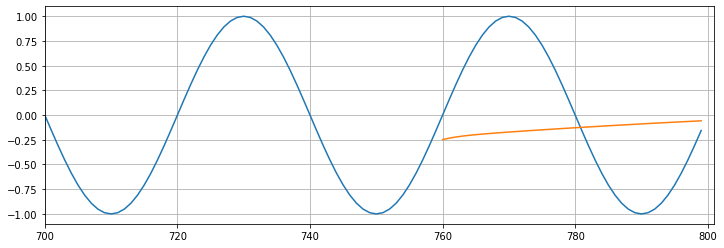

Epoch: 23 Loss: 0.05369127
Loss on test predictions: 0.5731619000434875


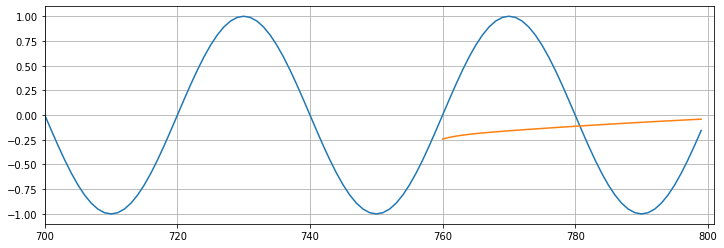

Epoch: 24 Loss: 0.05124586
Loss on test predictions: 0.5724377036094666


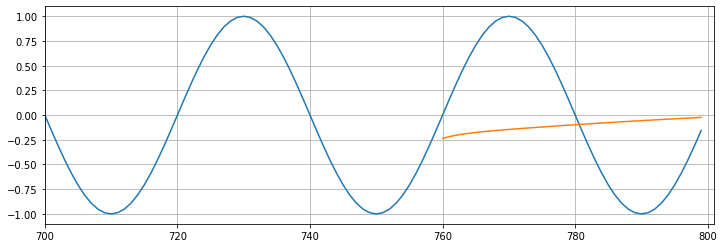

Epoch: 25 Loss: 0.04879847
Loss on test predictions: 0.5719570517539978


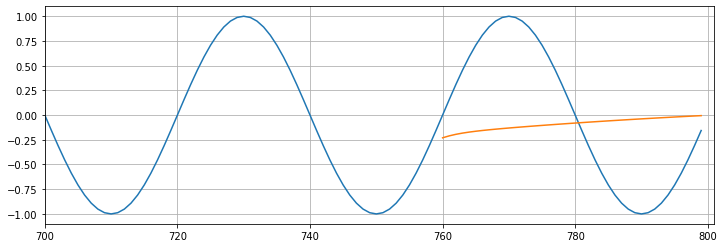

Epoch: 26 Loss: 0.04634415
Loss on test predictions: 0.5716966390609741


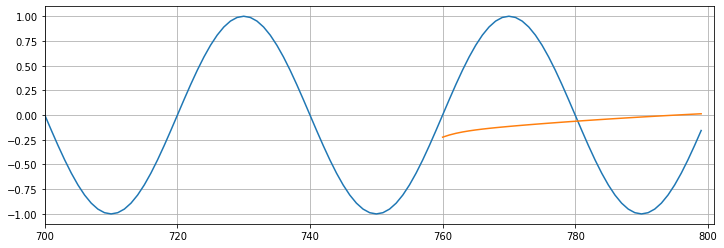

Epoch: 27 Loss: 0.04387934
Loss on test predictions: 0.571609616279602


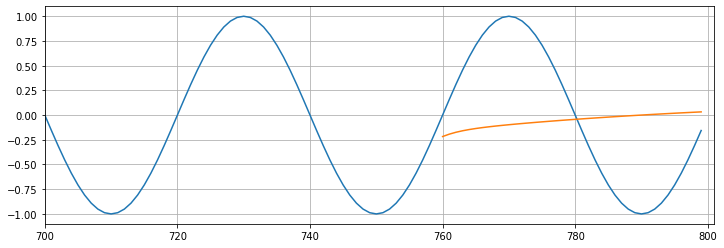

Epoch: 28 Loss: 0.04140247
Loss on test predictions: 0.5716160535812378


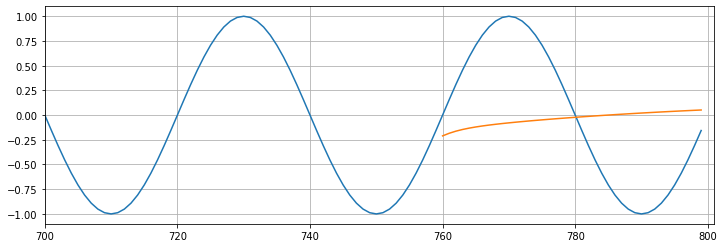

Epoch: 29 Loss: 0.03891350
Loss on test predictions: 0.5715894103050232


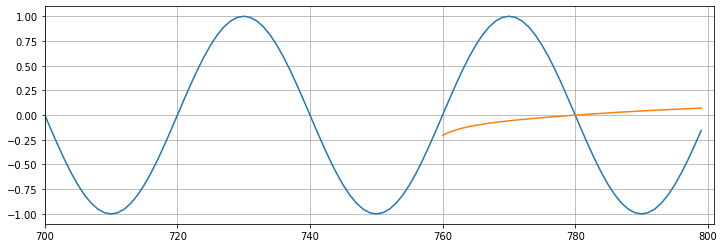

Epoch: 30 Loss: 0.03641469
Loss on test predictions: 0.5713436007499695


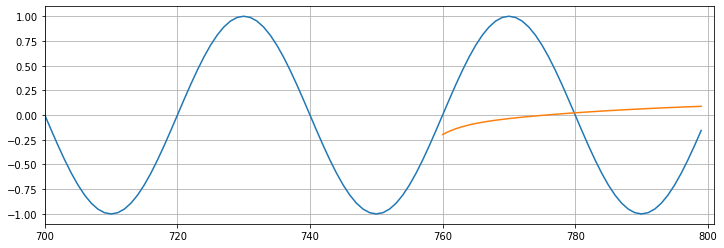

Epoch: 31 Loss: 0.03391068
Loss on test predictions: 0.570614755153656


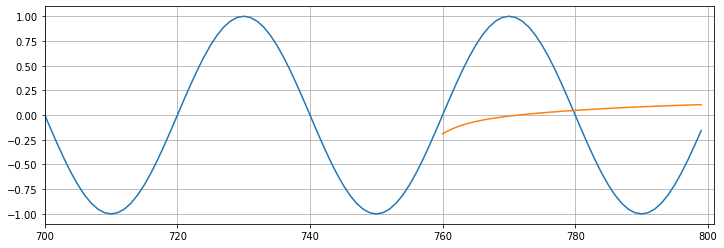

Epoch: 32 Loss: 0.03140865
Loss on test predictions: 0.5690500140190125


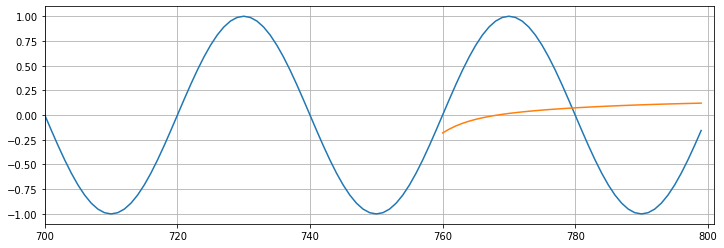

Epoch: 33 Loss: 0.02891833
Loss on test predictions: 0.5662002563476562


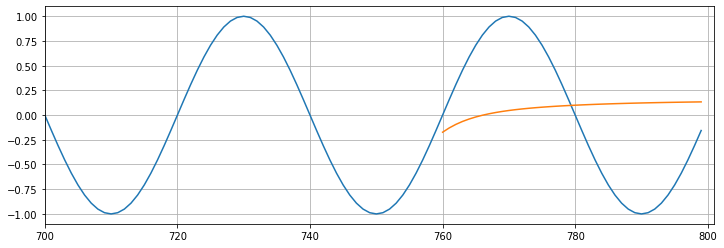

Epoch: 34 Loss: 0.02645216
Loss on test predictions: 0.5615200996398926


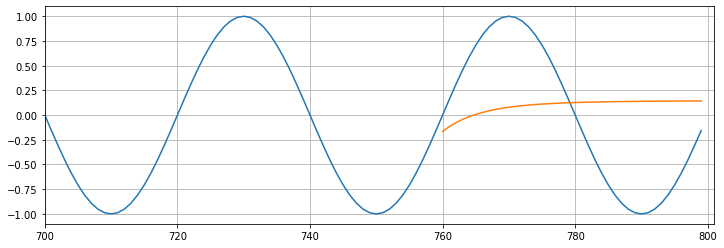

Epoch: 35 Loss: 0.02402505
Loss on test predictions: 0.5543896555900574


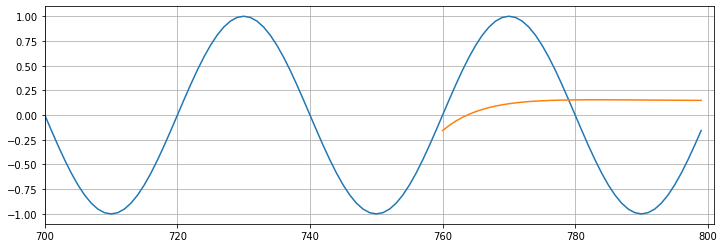

Epoch: 36 Loss: 0.02165410
Loss on test predictions: 0.544150173664093


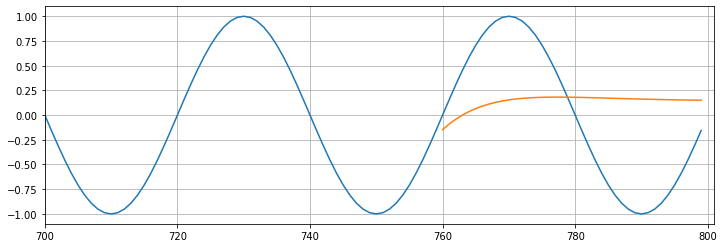

Epoch: 37 Loss: 0.01935804
Loss on test predictions: 0.5301651954650879


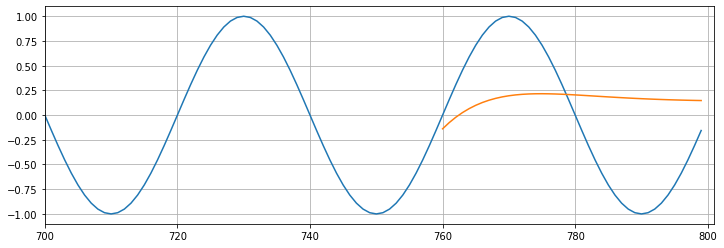

Epoch: 38 Loss: 0.01715650
Loss on test predictions: 0.5118942260742188


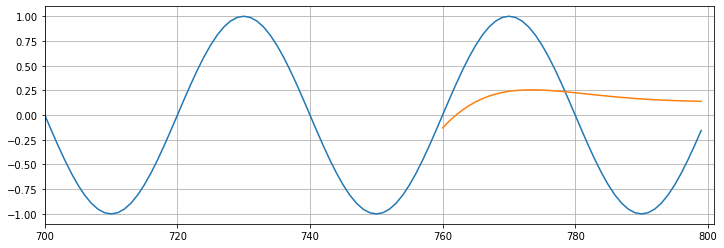

Epoch: 39 Loss: 0.01506883
Loss on test predictions: 0.488974004983902


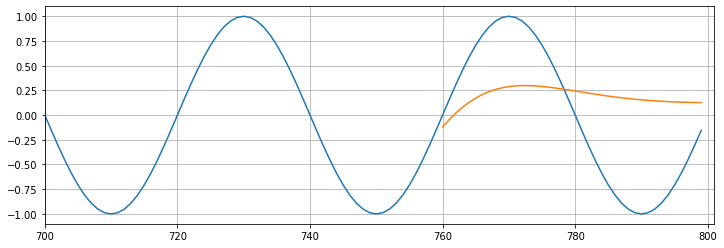

Epoch: 40 Loss: 0.01311308
Loss on test predictions: 0.46129631996154785


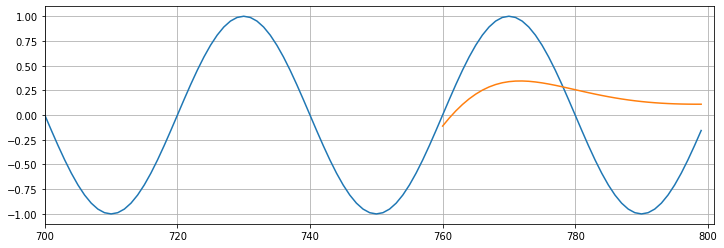

Epoch: 41 Loss: 0.01130495
Loss on test predictions: 0.42905858159065247


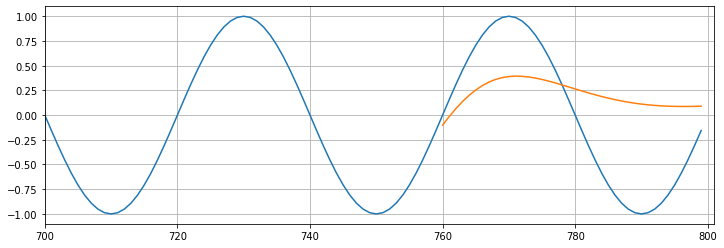

Epoch: 42 Loss: 0.00965634
Loss on test predictions: 0.39279085397720337


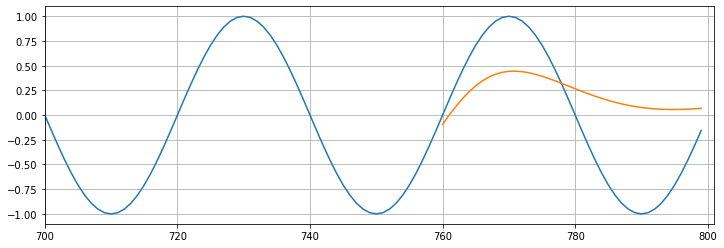

Epoch: 43 Loss: 0.00817489
Loss on test predictions: 0.3533551096916199


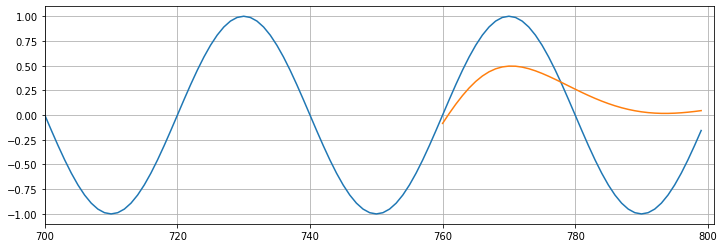

Epoch: 44 Loss: 0.00686314
Loss on test predictions: 0.31189391016960144


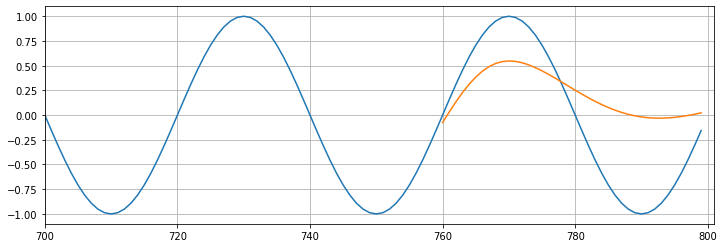

Epoch: 45 Loss: 0.00571870
Loss on test predictions: 0.26977336406707764


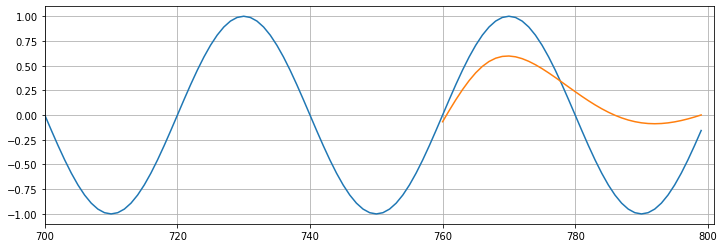

Epoch: 46 Loss: 0.00473459
Loss on test predictions: 0.22847209870815277


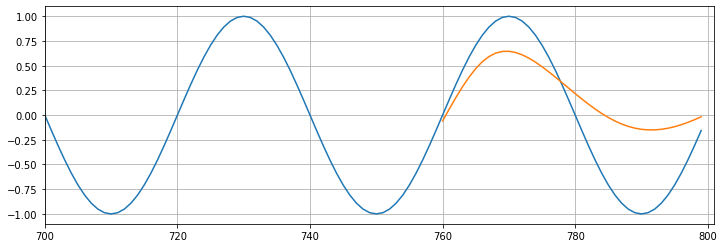

Epoch: 47 Loss: 0.00389996
Loss on test predictions: 0.18943633139133453


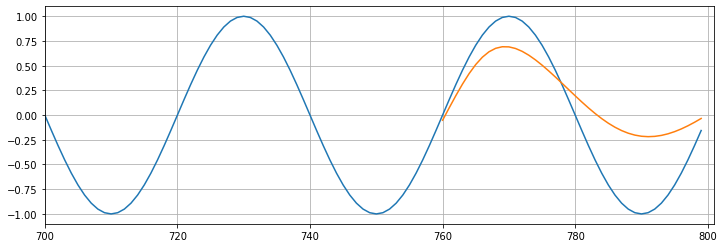

Epoch: 48 Loss: 0.00320116
Loss on test predictions: 0.15390998125076294


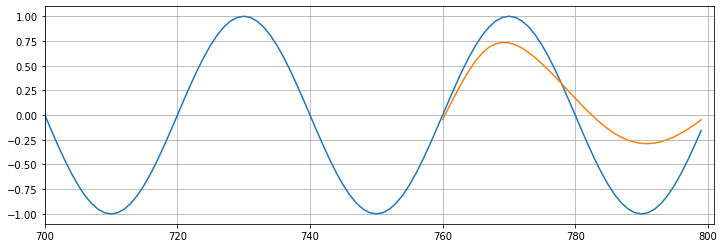

Epoch: 49 Loss: 0.00262293
Loss on test predictions: 0.12277257442474365


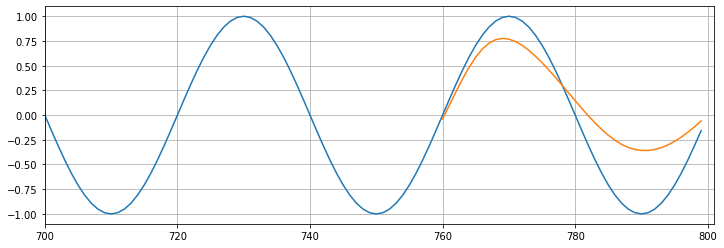

Epoch: 50 Loss: 0.00214937
Loss on test predictions: 0.09644763916730881


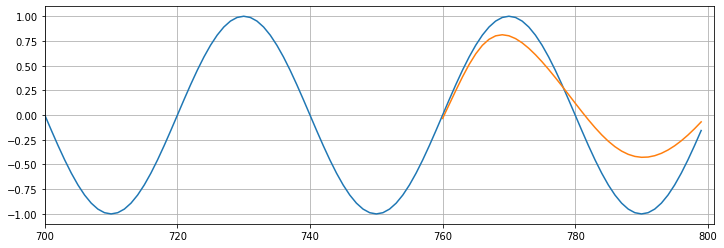

In [17]:
epochs = 50
future = 40

for i in range(epochs):
    
    # tuple-unpack the train_data set
    for seq, y_train in train_data:
        
        # reset the parameters and hidden states
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)
        
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        
    # print training result
    print(f'Epoch: {i+1:2} Loss: {loss.item():10.8f}')
    
    # MAKE PREDICTIONS
    # start with a list of the last 10 training records
    preds = train_set[-window_size:].tolist()

    for f in range(future):  
        seq = torch.FloatTensor(preds[-window_size:])
        with torch.no_grad():
            model.hidden = (torch.zeros(1,1,model.hidden_size),
                            torch.zeros(1,1,model.hidden_size))
            preds.append(model(seq).item())
            
    loss = criterion(torch.tensor(preds[-window_size:]),y[760:])
    print(f'Loss on test predictions: {loss}')

    # Plot from point 700 to the end
    plt.figure(figsize=(12,4))
    plt.xlim(700,801)
    plt.grid(True)
    plt.plot(y.numpy())
    plt.plot(range(760,800),preds[window_size:])
    plt.show()

In [18]:
### Train whole data

epochs = 15
window_size = 40
future = 40

all_data = input_data(y, window_size)

In [19]:
len(all_data)

760

In [21]:
all_data[0]

(tensor([     0.0000,      0.1564,      0.3090,      0.4540,      0.5878,
              0.7071,      0.8090,      0.8910,      0.9511,      0.9877,
              1.0000,      0.9877,      0.9511,      0.8910,      0.8090,
              0.7071,      0.5878,      0.4540,      0.3090,      0.1564,
             -0.0000,     -0.1564,     -0.3090,     -0.4540,     -0.5878,
             -0.7071,     -0.8090,     -0.8910,     -0.9511,     -0.9877,
             -1.0000,     -0.9877,     -0.9511,     -0.8910,     -0.8090,
             -0.7071,     -0.5878,     -0.4540,     -0.3090,     -0.1564]),
 tensor([    0.0000]))

In [24]:
import time
start_time = time.time()

for i in range(epochs):
    for seq, y_train in all_data:
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        y_pred = model(seq)
        
        loss = criterion(y_pred, y_train)
        
        loss.backward()
        optimizer.step()
    
    print(f"Epoch: {i+1:2} Loss: {loss.item():10.8f}")

print(f"\Duration: {time.time() - start_time:.0f} seconds")

Epoch: 1:2 Loss: 0.00174576
Epoch: 2:2 Loss: 0.00142446
Epoch: 3:2 Loss: 0.00117014
Epoch: 4:2 Loss: 0.00096962
Epoch: 5:2 Loss: 0.00081192
Epoch: 6:2 Loss: 0.00068793
Epoch: 7:2 Loss: 0.00059040
Epoch: 8:2 Loss: 0.00051355
Epoch: 9:2 Loss: 0.00045283
Epoch: 10:2 Loss: 0.00040473
Epoch: 11:2 Loss: 0.00036646
Epoch: 12:2 Loss: 0.00033593
Epoch: 13:2 Loss: 0.00031149
Epoch: 14:2 Loss: 0.00029185
Epoch: 15:2 Loss: 0.00027603
\Duration: 114 seconds


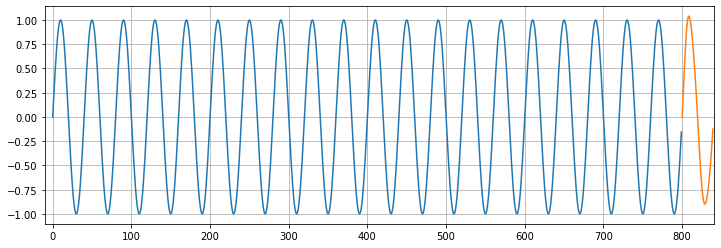

In [27]:
preds = y[-window_size:].tolist()

for i in range(future):
    seq = torch.FloatTensor(preds[-window_size:])
    with torch.no_grad():
        # Reset the hidden parameters
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        preds.append(model(seq).item())
        
plt.figure(figsize=(12, 4))
plt.xlim(-10, 841)
plt.grid(True)
plt.plot(y.numpy())
plt.plot(range(800, 800+future), preds[window_size:])
plt.show()